<h1 style="text-align: center;">CHURN PREDICTION ANALYSIS FOR BLUE-VALLEY BANK</h1>

<img src='bank photo.jpg'>

<h3 style="font-size:36px;">Overview</h3>


<body>
At the Blue-Valley Bank,we noticed a worrying trend that clients were leaving and by the time this was realized it was too late to keep them.As the senior data scientist ,i led and investigation into five years of operational data to understand the root cause of these losses.By exploring features in the data uncovering of hidden signals that indicated customers churning was indentified

Using these insights we built a predictive model to segment customers by their churn risk that is high,moderate and low.Through this  the model transformed the bank's approach from reacting after the fact to proactively reaching out to vulnerable clients.Now armed with the model built the Blue valley bank is at a better position to retain valuable clients and prevent losses
</body>

<h3 style="font-size:36px;">Business Understanding</h3>


<h3 style="font-size:36px;"><b>Problem Statement</b></h3>


<body>
Blue-Valley Bank has faced rsing customer churn over the past five years,resulting in significant financial losses.The bank lacked a way to predict which customers were at risk of leavinf early enough to intervene.This project focuses on analyzing customer data to build a suitable  predictive model that identifies high risk churners and supports targeted retention efforts
</body>    

<h3 style="font-size:36px;">Main Objective</h3>



<body>
    How can we predict which clients of Blue-Valley bank are likely to churn and how can we segment them based on their churn risk using an appropriate predictive model?
    </body>

<h3 style="font-size:36px;">Specific Objective</h3>



<ul>
<li>Which features most influence whether a client will churn or not at Blue-Valley Bank?</li>
<li>Which predictive model between logistic and decision tree will most effectively identify clients likely to churn?</li>
<li>How can clients be segmented into high,moderate and low churn risk categories based on their predicated probability of churning?</li>
</ul>

<h3 style="font-size:36px;">DATA UNDERSTANDING</h3>


we first import libraries, load the dataset and the understand our data

In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,precision_score,recall_score

In [28]:
#loading the dataset 
df=pd.read_csv('churn_prediction.csv')
df

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,5390.37,...,7799.26,12419.41,0.56,0.56,5486.27,100.56,6496.78,8787.61,0,2019-11-01
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
3,5,2329,90,NaN,NaN,self_employed,1020.0,2,582,2291.91,...,2084.54,1006.54,0.47,0.47,0.47,2143.33,2291.91,1669.79,1,2019-08-06
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,Female,0.0,student,1020.0,2,1207,1076.43,...,2282.19,2787.70,0.30,0.30,0.30,0.30,1076.43,1076.43,0,2019-10-22
28378,30298,1537,34,Female,0.0,self_employed,1046.0,2,223,3844.10,...,3668.83,3865.55,1.71,2.29,901.00,1014.07,3738.54,3690.32,0,2019-12-17
28379,30299,2376,47,Male,0.0,salaried,1096.0,2,588,65511.97,...,53444.81,21925.81,4666.84,3883.06,168.23,71.80,61078.50,57564.24,1,2019-12-31
28380,30300,1745,50,Male,3.0,self_employed,1219.0,3,274,1625.55,...,1683.20,1857.42,0.20,0.20,0.20,0.20,1625.55,1625.55,0,NaT


In [29]:
#check data infomation and preview
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   current_balance                 28382 non-null  float64
 10  previous_month_end_balance      28382 non-null  float64
 11  average_monthly_balance_prevQ   28382 non-null  float64
 12  average_monthly_balance_prevQ2  

We have 28382 entries with 21 columns 6 integer columns 3 objects and 11 float columns

In [30]:
# we also check the descriptive analysis
df.describe()

,customer_id,vintage,age,dependents,city,customer_nw_category,branch_code,current_balance,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,25919.000000,27579.000000,28382.000000,28382.000000,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
mean,15143.508667,2091.144105,48.208336,0.347236,796.109576,2.225530,925.975019,7.380552e+03,7.495771e+03,7.496780e+03,7.124209e+03,3.433252e+03,3.261694e+03,3.658745e+03,3.339761e+03,7.451133e+03,7.495177e+03,0.185329
std,8746.454456,272.676775,17.807163,0.997661,432.872102,0.660443,937.799129,4.259871e+04,4.252935e+04,4.172622e+04,4.457581e+04,7.707145e+04,2.968889e+04,5.198542e+04,2.430111e+04,4.203394e+04,4.243198e+04,0.388571
min,1.000000,73.000000,1.000000,0.000000,0.000000,1.000000,1.000000,-5.503960e+03,-3.149570e+03,1.428690e+03,-1.650610e+04,1.000000e-02,1.000000e-02,1.000000e-02,1.000000e-02,-3.374180e+03,-5.171920e+03,0.000000
25%,7557.250000,1958.000000,36.000000,0.000000,409.000000,2.000000,176.000000,1.784470e+03,1.906000e+03,2.180945e+03,1.832507e+03,3.100000e-01,3.300000e-01,4.100000e-01,4.100000e-01,1.996765e+03,2.074407e+03,0.000000
50%,15150.500000,2154.000000,46.000000,0.000000,834.000000,2.000000,572.000000,3.281255e+03,3.379915e+03,3.542865e+03,3.359600e+03,6.100000e-01,6.300000e-01,9.193000e+01,1.099600e+02,3.447995e+03,3.465235e+03,0.000000
75%,22706.750000,2292.000000,60.000000,0.000000,1096.000000,3.000000,1440.000000,6.635820e+03,6.656535e+03,6.666887e+03,6.517960e+03,7.072725e+02,7.492350e+02,1.360435e+03,1.357553e+03,6.667958e+03,6.654693e+03,0.000000
max,30301.000000,2476.000000,90.000000,52.000000,1649.000000,3.000000,4782.000000,5.905904e+06,5.740439e+06,5.700290e+06,5.010170e+06,1.226985e+07,2.361808e+06,7.637857e+06,1.414168e+06,5.778185e+06,5.720144e+06,1.000000


<h3 style="font-size:36px;">DATA PREPARATION</h3>
<ol>
<li>Handle missing values</li>
<li>check for duplicates and remove</li>
<li>check for  outliers</li>
</ol>


In [31]:
# we will remove check for missing values and remove them 
df.isna().sum().sum()

3871

In [32]:
#lets see the columns that have missing values
df.isna().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
last_transaction                     0
dtype: int64

For the missing values since the values have few missing values we will drop them the highest has 2463 

In [33]:
#df.dropna(subset=['gender','occupation','city','dependents'],inplace=True)
df.dropna(inplace=True)

In [34]:
#check if the missing values are gone for the three columns
df.isna().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
last_transaction                  0
dtype: int64

In [35]:
df.head()#we check if there is another column that still has missing values

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
5,7,1923,42,Female,0.0,self_employed,1096.0,2,1666,15202.20,...,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,2019-11-01
6,8,2048,72,Male,0.0,retired,1020.0,1,1,7006.93,...,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,2019-09-24


In [36]:
#change age to integer
df['age'].astype(int)

0        66
2        31
4        42
5        42
6        72
         ..
28377    10
28378    34
28379    47
28380    50
28381    18
Name: age, Length: 24832, dtype: int32

i noticed for the last transaction it had missing values and thats why it was not being detected so i had to convert to date time format and then drop the missing values since its 9.7% of the 28382 entries which is quite few 

In [37]:
# we will try to convert the column to right date time we see if it will see the date time change
df['last_transaction']=pd.to_datetime(df['last_transaction'],format='%Y/%m/%d')
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,current_balance,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,last_transaction
0,1,2101,66,Male,0.0,self_employed,187.0,2,755,1458.71,...,1458.71,1449.07,0.20,0.20,0.20,0.20,1458.71,1458.71,0,2019-05-21
2,4,2194,31,Male,0.0,salaried,146.0,2,41,3913.16,...,4910.17,2815.94,0.61,0.61,6046.73,259.23,5006.28,5070.14,0,NaT
4,6,1579,42,Male,2.0,self_employed,1494.0,3,388,927.72,...,1643.31,1871.12,0.33,714.61,588.62,1538.06,1157.15,1677.16,1,2019-11-03
5,7,1923,42,Female,0.0,self_employed,1096.0,2,1666,15202.20,...,15211.29,13798.82,0.36,0.36,857.50,286.07,15719.44,15349.75,0,2019-11-01
6,8,2048,72,Male,0.0,retired,1020.0,1,1,7006.93,...,7859.74,11232.37,0.64,0.64,1299.64,439.26,7076.06,7755.98,0,2019-09-24


In [38]:
# we will check the missing values
df['last_transaction'].isna().sum().sum()

2765

In [39]:
df['last_transaction'].unique()

array(['2019-05-21T00:00:00.000000000',                           'NaT',
       '2019-11-03T00:00:00.000000000', '2019-11-01T00:00:00.000000000',
       '2019-09-24T00:00:00.000000000', '2019-07-12T00:00:00.000000000',
       '2019-12-12T00:00:00.000000000', '2019-12-31T00:00:00.000000000',
       '2019-12-26T00:00:00.000000000', '2019-12-11T00:00:00.000000000',
       '2019-11-14T00:00:00.000000000', '2019-03-03T00:00:00.000000000',
       '2019-11-09T00:00:00.000000000', '2019-12-28T00:00:00.000000000',
       '2019-10-23T00:00:00.000000000', '2019-11-30T00:00:00.000000000',
       '2019-12-08T00:00:00.000000000', '2019-12-18T00:00:00.000000000',
       '2019-12-27T00:00:00.000000000', '2019-12-22T00:00:00.000000000',
       '2019-12-04T00:00:00.000000000', '2019-11-25T00:00:00.000000000',
       '2019-08-28T00:00:00.000000000', '2019-10-15T00:00:00.000000000',
       '2019-12-21T00:00:00.000000000', '2019-09-25T00:00:00.000000000',
       '2019-12-05T00:00:00.000000000', '2019-09-22

In [40]:
df.dropna(subset=['last_transaction'],inplace=True)

In [41]:
df['last_transaction'].isna().sum().sum()#the null values in the last_transaction are now gone

0

Next step is checking for duplicates

In [42]:
df.duplicated().sum()# no duplicates present

0

Next step checking for outliers

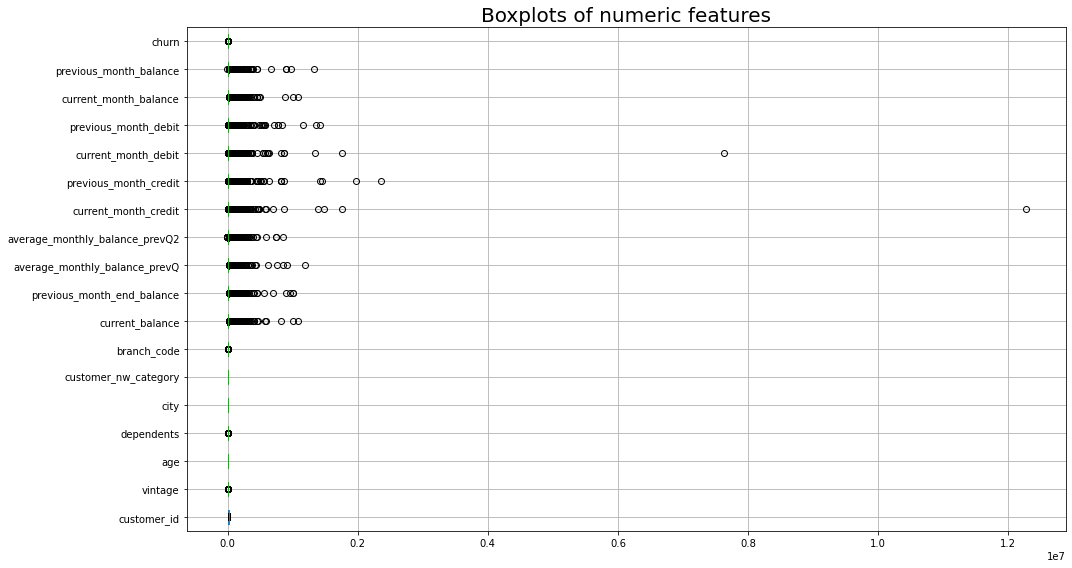

In [43]:
df.select_dtypes(include='number').boxplot(figsize=(15,8),vert=False)
plt.title("Boxplots of numeric features",fontsize=20)
plt.tight_layout()
plt.show()
        

As you can see majority here have outliers so i will try to remove the outliers so as to prevent biasness in the dataset

In [44]:
def outliers(df,col):
    upper_limit=df[col].mean() +3 *df[col].std()
    lower_limit=df[col].mean()-3 * df[col].std()
#create a list that will store the index of the outliers
    #ls=df.index[(df[cols] <lower_limit) | (df[cols] >upper_limit)]
    ls= df[(df[col] < lower_limit) | (df[col] > upper_limit)].index.tolist()

    return ls

In [45]:
index_list=[]

columns = ['current_balance', 'average_monthly_balance_prevQ',
           'average_monthly_balance_prevQ2', 'current_month_credit',
           'previous_month_credit', 'current_month_debit',
           'previous_month_debit', 'current_month_balance',
           'previous_month_balance']
for col in columns:
    index_list.extend(outliers(df,col))
    index_list=list(set(index_list))

In [46]:
df_cleaned=df.drop(index=index_list)

In [47]:
df_cleaned=df

<h4 style="font-size:36px;">EXPLORATIVE DATA ANALYSIS</h4>
<ol>
<li>check relationships between different features</li>
<li>check for correlation among features and drop if necessary</li>
<li>check for  distribution between churners and non churners</li>
</ol>

step1:<h7>Univariate Analysis</h7>

In [48]:
#check distribution between churners and non churners we see if they are equal or not
df['churn'].value_counts()
# as you can see we have an imbalanced dataset where we have more non churners than  churners we will handle that later in the code

0    17793
1     4274
Name: churn, dtype: int64

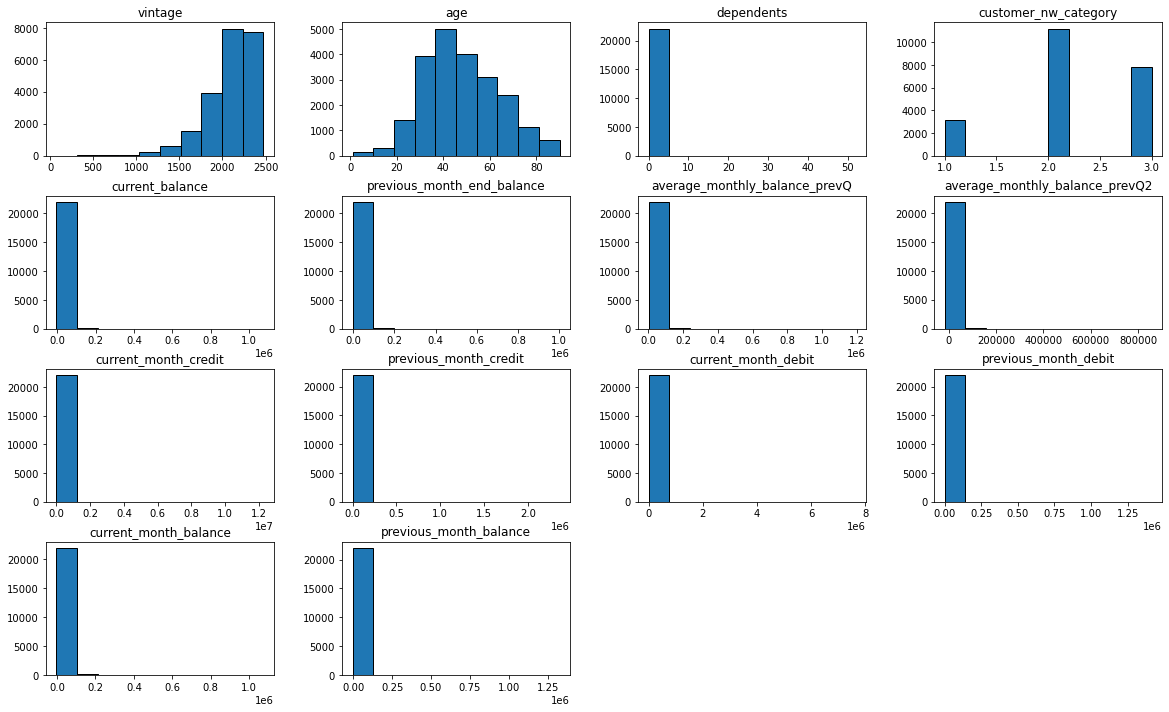

In [49]:
#For the numerical variables we will use histograms to check for skewness
exclude_columns=['customer_id','branch_code','churn','city']
columns=df.select_dtypes(include='number').drop(columns=exclude_columns)
columns.hist(figsize=(20,12),bins=10,edgecolor='black',grid=False)
plt.title("histogram of numeric features",fontsize=20)
plt.show()

The graph interpretation:   
Most of the graphs except vintage are rightly skewed for age is almost symmetrical so we have to scale,handle imbalance,one hot encode for categorical columns in the feature engineering stage

<H4>Bivariate Analysis Using One Graph</H4>
Here its giving us insights how churn is distributed in various columns the ones with boxplots are numerical the ones with counter plot are the once in categorical we have also done some feature engineering so that we can get the credit change,debit change how is the balance and how many days did the client take before doing another transaction at the end of the graph i will in detail explain the findings
NOTE:this interpration before scaling and handling imbalance


In [50]:
# Preprocessing for derived columns
df['credit_change'] = df['current_month_credit'] - df['previous_month_credit']
df['debit_change'] = df['current_month_debit'] - df['previous_month_debit']
df['balance_change'] = df['current_balance'] - df['previous_month_end_balance']
df['last_transaction'] = pd.to_datetime(df['last_transaction'])
df['days_since_last_txn'] = (df['last_transaction'].max() - df['last_transaction']).dt.days

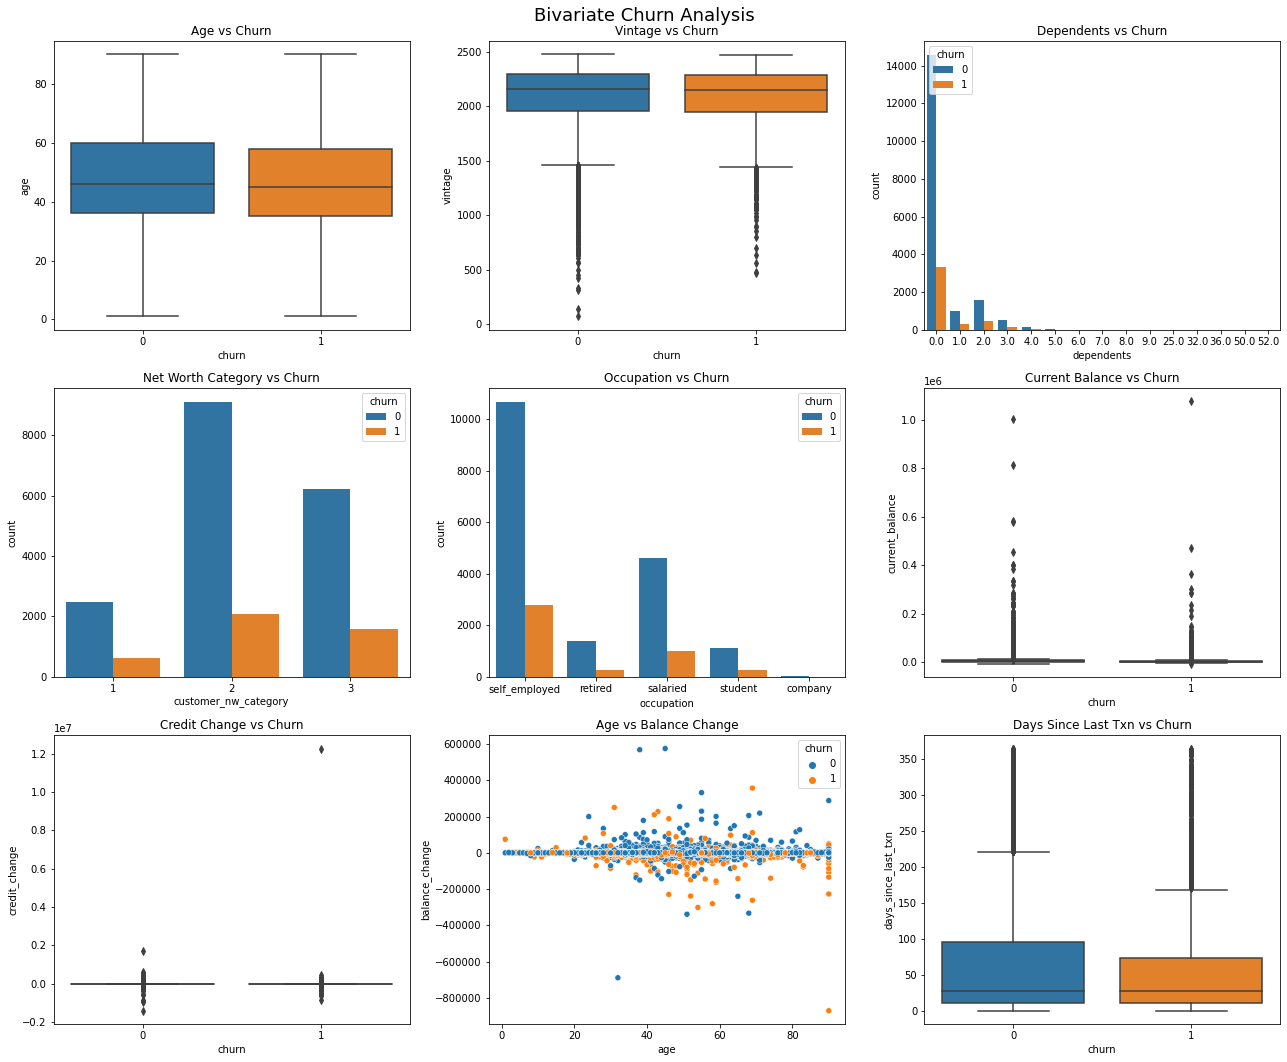

In [51]:
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('Bivariate Churn Analysis', fontsize=18)
#plot1:Age vs churn
sns.boxplot(x='churn', y='age', data=df, ax=axes[0, 0])
axes[0, 0].set_title('Age vs Churn')
# Plot 2: Vintage vs Churn
sns.boxplot(x='churn', y='vintage', data=df, ax=axes[0, 1])
axes[0, 1].set_title('Vintage vs Churn')
# Plot 3: Dependents vs Churn
sns.countplot(x='dependents', hue='churn', data=df, ax=axes[0, 2])
axes[0, 2].set_title('Dependents vs Churn')
# Plot 4: NW Category vs Churn
sns.countplot(x='customer_nw_category', hue='churn', data=df, ax=axes[1, 0])
axes[1, 0].set_title('Net Worth Category vs Churn')
# Plot 5: Occupation vs Churn
sns.countplot(x='occupation', hue='churn', data=df, ax=axes[1, 1])
axes[1, 1].set_title('Occupation vs Churn')
# Plot 6: Current Balance vs Churn
sns.boxplot(x='churn', y='current_balance', data=df, ax=axes[1, 2])
axes[1, 2].set_title('Current Balance vs Churn')
# Plot 7: Credit Change vs Churn
sns.boxplot(x='churn', y='credit_change', data=df, ax=axes[2, 0])
axes[2, 0].set_title('Credit Change vs Churn')
# Plot 8: Balance Change vs Age
sns.scatterplot(x='age', y='balance_change', hue='churn', data=df, ax=axes[2, 1])
axes[2, 1].set_title('Age vs Balance Change')
# Plot 9: Days Since Last Txn vs Churn
sns.boxplot(x='churn', y='days_since_last_txn', data=df, ax=axes[2, 2])
axes[2, 2].set_title('Days Since Last Txn vs Churn')

plt.tight_layout()
plt.show()


<h5>Graph Interpration</h5>
<ol>
<li>Age vs churn>
churners(1) tend to be slighly younger than non churners(0)
here the median age of churners is lower
conclusion:Younger aged clients are the likely to churn since they may be slightly younger on average
</li>    
<li>Vintage vs churn>
the vintage refers to how long the client has stayed in the bank and this case the churned customers is significantly lower than the retained ones
conclusion:newer customers are more prone to churn the once who have stayed longer
</li>
<li>dependents vs churn>
most clients have dependents between 0-2 dependents especially in the churn category
the clients with more dependents are fewer and less likely to churn
</li>
<li>Net worth category vs churn>
The majority of clients or the non churners are in the second category,but when it comes to higher churn ratio which are the low net worth are the ones likely to churn
</li>
 <li>Occupation vs churn>
Salaried and self employed are the most common
self employed clients show high churn while retired and student clients show few churn
</li>
<li>current Balance vs churn>
churners seem to have lower current balance
</li>
<li>Credit change vs churn>
First there is high fluctuations in credit exist for both and we have to normalize due to skewness but there is no strong relationship between credit changes and churn
</li>
<li>Age vs balance change>
there is a weak positive correlation between the two 
</li>
<li>Days since last transaction vs churn>
The longer the last transation the more signs of inactivity and this might cause churn
</li>

<h4 style="font-size:36px;">FEATURE ENGINEERING</h4>
<ol>
<li>one hot encode for categorical features</li>
<li>log transform for  Right skewed features</li>
</ol>